## For the purpose of this Project we will be
creating one such Recommendation Engine
from the ground up, where every single user,
based on their area of interest and ratings,
would be recommended a list of movies that
are best suited for them.

# Objective:
# 1.Find out the list of most popular and liked genre
# 2.Create Model that finds the best suited Movie for one user in every genre.
# 3.Find what Genre Movies have received the best and worst ratings based on User Rating.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
mf = pd.read_csv('movies.csv')
mf1 = pd.read_csv('ratings.csv')

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
mf

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [14]:
mf.shape

(27278, 3)

In [15]:
mf.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [16]:
mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [17]:
mf.duplicated().sum()

0

In [18]:
mf.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [19]:
mf.describe()

,movieId
count,27278.000000
mean,59855.480570
std,44429.314697
min,1.000000
25%,6931.250000
50%,68068.000000
75%,100293.250000
max,131262.000000


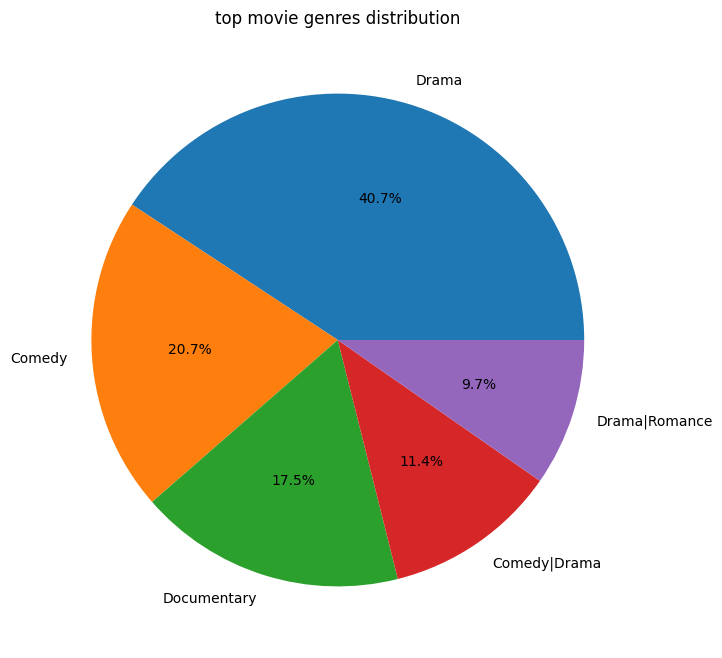

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

genre_count = mf['genres'].value_counts()
top_n = 10
top_genres = genre_count.head()

plt.figure(figsize = (8,8))
plt.pie(top_genres, labels = top_genres.index,autopct = '%1.1f%%')
plt.title('top movie genres distribution')
plt.show()

In [21]:
mf1

,userId,movieId,rating,timestamp
0,1,2.0,3.5,1.112486e+09
1,1,29.0,3.5,1.112485e+09
2,1,32.0,3.5,1.112485e+09
3,1,47.0,3.5,1.112485e+09
4,1,50.0,3.5,1.112485e+09
...,...,...,...,...
706583,4696,376.0,4.0,1.150533e+09
706584,4696,377.0,5.0,1.150532e+09
706585,4696,380.0,5.0,1.150532e+09
706586,4696,381.0,4.0,1.150535e+09


In [22]:
mf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706588 entries, 0 to 706587
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     706588 non-null  int64  
 1   movieId    706587 non-null  float64
 2   rating     706587 non-null  float64
 3   timestamp  706587 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 21.6 MB


In [23]:
mf1['timestamp'] = pd.to_datetime(mf1['timestamp'], unit = 's')

In [24]:
mf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706588 entries, 0 to 706587
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     706588 non-null  int64         
 1   movieId    706587 non-null  float64       
 2   rating     706587 non-null  float64       
 3   timestamp  706587 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 21.6 MB


In [25]:
mf1.isnull().sum()

userId       0
movieId      1
rating       1
timestamp    1
dtype: int64

In [26]:
mf1.duplicated().sum()

0

In [27]:
mf1.describe()

,userId,movieId,rating
count,706588.000000,706587.000000,706587.000000
mean,2388.210788,8793.689076,3.520021
std,1355.007141,19332.330228,1.054577
min,1.000000,1.000000,0.500000
25%,1194.000000,904.000000,3.000000
50%,2378.000000,2160.000000,3.500000
75%,3578.000000,4718.000000,4.000000
max,4696.000000,130642.000000,5.000000


In [28]:
# for most popular and liked genres

genres_ratings = mf1.merge(mf, on = 'movieId', how = 'left' )
genres_ratings = genres_ratings.groupby('genres')['rating'].mean().sort_values(ascending = False)

In [29]:
genres_ratings.head()

genres
Adventure|Fantasy|Mystery                                       5.0
Comedy|Drama|Musical|Romance|War                                5.0
Comedy|Crime|Western                                            5.0
Action|Comedy|Horror|Romance|Sci-Fi                             5.0
Adventure|Comedy|Crime|Drama|Fantasy|Mystery|Sci-Fi|Thriller    5.0
Name: rating, dtype: float64

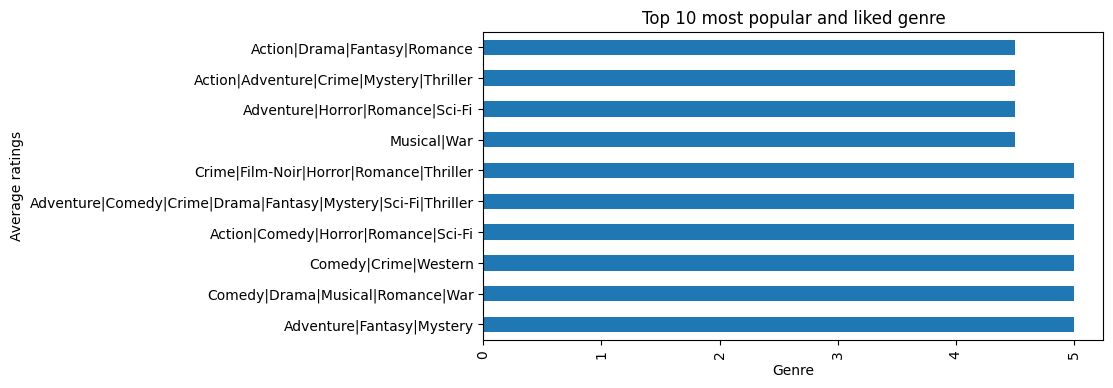

In [30]:
plt.figure(figsize = (8,4))
genres_ratings.head(10).plot(kind = 'barh')
plt.xlabel('Genre')
plt.ylabel('Average ratings')
plt.title('Top 10 most popular and liked genre')
plt.xticks(rotation = 90)
plt.show()

# From the above bar plot after visualization we observed the 10 most popular and liked genres having ratings above 4.

# 2. Create Model that finds the best suited Movie for one user in every genre.

In [31]:
mf1

,userId,movieId,rating,timestamp
0,1,2.0,3.5,2005-04-02 23:53:47
1,1,29.0,3.5,2005-04-02 23:31:16
2,1,32.0,3.5,2005-04-02 23:33:39
3,1,47.0,3.5,2005-04-02 23:32:07
4,1,50.0,3.5,2005-04-02 23:29:40
...,...,...,...,...
706583,4696,376.0,4.0,2006-06-17 08:35:18
706584,4696,377.0,5.0,2006-06-17 08:19:19
706585,4696,380.0,5.0,2006-06-17 08:18:13
706586,4696,381.0,4.0,2006-06-17 09:06:45


In [32]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

userId = 123

# Convert the integer user ID to a string and add a prefix
formatted_userId = '1' + str(userId)

# Now, formatted_user_id is '1123'

# List of all genres

all_genres = ['Action', 'Comedy', 'Drama','Adventure','Horror','Fantasy','Romance','Children']

# create user_preference dataframe with all genres & having ratings of 5
user_preference = pd.DataFrame({'genres' : all_genres, 'rating' : [5,5,5,5,5,5,5,5]})

# Merege the user_prefernece with movie dataset
user_preference_movie = mf.merge(mf1, on = 'movieId', how = 'inner')

# Filter movies that the user hasn't seen
user_unseen_movies = user_preference_movie[~user_preference_movie['movieId'].isin(mf1[mf1['userId'] == formatted_userId]['movieId'])]
user_unseen_movies = user_unseen_movies[user_unseen_movies['rating'] == 5]

# Find the highest-rated movie in each genre
best_movies_by_genre = user_unseen_movies.groupby('genres').apply(lambda x: x[x['rating'] == x['rating'].max()])

# Display the recommended movies
print(best_movies_by_genre[['genres', 'title', 'rating']])

                                             genres  \
1       Adventure|Animation|Children|Comedy|Fantasy   
9       Adventure|Animation|Children|Comedy|Fantasy   
14      Adventure|Animation|Children|Comedy|Fantasy   
15      Adventure|Animation|Children|Comedy|Fantasy   
19      Adventure|Animation|Children|Comedy|Fantasy   
...                                             ...   
706421                                  Documentary   
706423                                  Documentary   
706441                                       Sci-Fi   
706444                            Adventure|Fantasy   
706459                            Adventure|Fantasy   

                                                   title  rating  
1                                       Toy Story (1995)     5.0  
9                                       Toy Story (1995)     5.0  
14                                      Toy Story (1995)     5.0  
15                                      Toy Story (1995)     5.0  
19  

In [33]:
# now to build a model that suggest best suited movies to user we can use two approaches as below:
# 1. collaborative filtering
# a. user-based collaborative filtering & b. item-based collaborative filtering
# 2. content based filterning techniques

In [34]:
mf

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [35]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163340 sha256=0ffd108093074cf13bcdbf05f862f2b6fdc38e62e329c180dd6abebaa2e25779
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [36]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer # used for text feture extration & transformation this is used
# to convert text data into numerical feature suitable for ML
from sklearn.metrics.pairwise import linear_kernel  # this is used to compute linear(dot product) similarity between two or
# more sets of data to calculate the cosine similarity between movies.
from surprise import Dataset, Reader, SVD # used for building and analyzing recommendation system.
from surprise.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [37]:
# performing content-based filtering to recommend movies based on their content, such as titles and genres.
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(mf['title']+''+ mf['genres'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [38]:
# collaborative_filtering for this we use surprise library
reader = Reader(rating_scale = (1,5))
data = Dataset.load_from_df(mf1[['userId', 'movieId', 'rating',]], reader)
trainset, testset = train_test_split(data, test_size = 0.2)
svd = SVD(n_factors = 100, verbose = True)
svd.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19


In [39]:
# hybrid_approach
# combine_collaborative & content-based recomendation

def hybrid_recommendation(userId, movieTitle, min_rating=5.0):
    movie_idx = mf.loc[mf['title'] == movieTitle].index[0]
    content_scores = list(enumerate(cosine_sim[movie_idx]))
    content_scores = sorted(content_scores, key=lambda x: x[1], reverse=True)
    content_scores = content_scores[1:11]  # Exclude the movie itself

    movie_indices = [i[0] for i in content_scores]
    hybrid_scores = []

    for idx in movie_indices:
        movie_id = mf.loc[idx, 'movieId']
        movie_name = mf.loc[idx, 'title']
        predicted_rating = svd.predict(userId, movie_id).est

        # Only include movies with a predicted rating of at least min_rating
        if predicted_rating >= min_rating:
            hybrid_scores.append((movie_id, movie_name, predicted_rating))

    # Sort by predicted rating
    hybrid_scores.sort(key=lambda x: x[2], reverse=True)

    return hybrid_scores

In [40]:
# Example usage
user_id = 1
movie_title = "Grumpier Old Men (1995)"
recommendations = hybrid_recommendation(user_id, movie_title)

# Print top recommended movies with a predicted rating of 5 or higher
print(recommendations)


[(55820, 'No Country for Old Men (2007)', 5), (3450, 'Grumpy Old Men (1993)', 5), (618, 'Two Much (1995)', 5), (114250, 'My Old Lady (2014)', 5), (1463, 'That Old Feeling (1997)', 5), (72696, 'Old Dogs (2009)', 5), (6188, 'Old School (2003)', 5), (105271, 'Gathering of Old Men, A (Murder on the Bayou) (1987)', 5), (47601, '7 Men from Now (Seven Men from Now) (1956)', 5), (1872, 'Go Now (1995)', 5)]


In [48]:
# 3.Find what Genre Movies have received the best and worst ratings based on User Rating.
# for this firstly we have to combine movies and rating dataset then calculate avg. rating fr each genres and then find the highest and
# lowest avg. ratings


# Step 1: Merge the two DataFrames
merged_data = mf1.merge(mf, on='movieId', how='left')

# Step 2: Calculate the average rating for each genre
genre_ratings = merged_data.groupby('genres')['rating'].mean().reset_index()

# Step 3: Find genres with the highest and lowest average ratings
best_genre = genre_ratings[genre_ratings['rating'] == genre_ratings['rating'].max()]
worst_genre = genre_ratings[genre_ratings['rating'] == genre_ratings['rating'].min()]

print("Genres with the best average ratings:")
print(best_genre)

print("Genres with the worst average ratings:")
print(worst_genre)


Genres with the best average ratings:
                                                genres  rating
207                Action|Comedy|Horror|Romance|Sci-Fi     5.0
438  Adventure|Comedy|Crime|Drama|Fantasy|Mystery|S...     5.0
520                          Adventure|Fantasy|Mystery     5.0
706                               Comedy|Crime|Western     5.0
730                   Comedy|Drama|Musical|Romance|War     5.0
834            Crime|Film-Noir|Horror|Romance|Thriller     5.0
Genres with the worst average ratings:
                                                 genres  rating
123             Action|Adventure|Horror|Sci-Fi|Thriller     0.5
399   Adventure|Animation|Drama|Fantasy|Musical|Romance     0.5
491                              Adventure|Drama|Horror     0.5
844                                 Crime|Horror|Sci-Fi     0.5
1037                                        War|Western     0.5
